# Bootstrap Estimate

To get estimate uncertainty around the delta parameter, we ran 20 bootstrap resamples, and calculated delta for each one.

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [76]:
root = 'bootstrapdata/bootstrap_deltas'

deltas = dict()

for i in range(1, 51):
    
    suffix = str(i) + '.csv'
    deltas[i] = pd.read_csv(root + suffix)
    
print(len(deltas), ' files loaded.')

50  files loaded.


In [77]:
interpret = pd.read_csv('../interrater/k200standardcoding.tsv', sep = '\t')
interpret.drop(columns = ['next5books, biggestauth, datequartiles', 'comments'], inplace = True)
interpret.head()

,topicstats,keywords,top7books,label,category
0,TOPIC 0 pct corpus = 0.267% doc entropy = 9.80...,war german french germans france germany ameri...,"0.136 | Gibbs, Philip | Through the storm | 19...","war, mostly WWII",event
1,TOPIC 1 pct corpus = 0.288% doc entropy = 9.74...,professor man quite something thing old little...,"0.177 | Stewart, J. I. M. (John Innes | Hare ...","e20c scientists, labs, and professors, mostly ...",genre
2,TOPIC 2 pct corpus = 0.479% doc entropy = 10.4...,door put box paper hand took room went made po...,"0.489 | Sellers, Tom | Unknown Title | 1927 0....","objects in relation to doors, pockets, rooms, ...",physical description
3,TOPIC 3 pct corpus = 0.388% doc entropy = 9.34...,american people president our security re new ...,"0.297 | Digo, Benjamin | Creator of Nikho | 19...",late 20c US political thrillers,genre
4,TOPIC 4 pct corpus = 0.666% doc entropy = 10.3...,man old people men because knew good always bi...,"0.157 | Hanley, Gerald | Drinkers of darkness ...",diffuse,uncategorized dimension of style


In [78]:
# FUNCTIONS THAT SIMPLIFY AND CLEAN THE CODING FRAME

def getpct(astring):
    firstpart = astring.split('%')[0]
    number = float(firstpart.split('= ')[1])
    return number

def shorten(astring):
    shortversion = astring[0:6]
    if shortversion == 'human ':
        shortversion = 'institu' # for human institution, practice, or relationship
    return shortversion

interpret['pct'] = interpret.topicstats.map(getpct)
interpret['category'] = interpret.category.map(shorten)
interpret.drop(columns = ['keywords', 'top7books', 'topicstats'], inplace = True)
interpret.head()

,label,category,pct
0,"war, mostly WWII",event,0.267
1,"e20c scientists, labs, and professors, mostly ...",genre,0.288
2,"objects in relation to doors, pockets, rooms, ...",physic,0.479
3,late 20c US political thrillers,genre,0.388
4,diffuse,uncate,0.666


In [79]:
topics = dict()
for i in range(1, len(deltas)):
    topics[i] = pd.concat([deltas[i], interpret], axis = 1)

In [80]:
def weighted_avg(aframe):
    avg = sum(aframe.pct * aframe.cmse) / (sum(aframe.pct * aframe.cmse) + sum(aframe.pct * aframe.pmse))
    return avg

def weighted_avg_oos(aframe):
    cmseoos = [0 if i < 0 else i for i in aframe.cmse_oos]
    pmseoos = [0 if i < 0 else i for i in aframe.pmse_oos]  
    avg = sum(aframe.pct * cmseoos) / (sum(aframe.pct * cmseoos) + sum(aframe.pct * pmseoos))
    return avg

In [81]:
weighted_averages = []

for i in range(1, len(deltas)):
    df = topics[i]
    legit = df.loc[(df.category != 'accide') & (df.category != 'author'), :]
    weighted_averages.append(round(weighted_avg(legit), 4))

(array([ 3.,  5.,  3., 10.,  5.,  3.,  2.,  2.,  1.,  8.,  2.,  2.,  1.,
         0.,  1.,  0.,  0.,  1.]),
 array([0.5225    , 0.52781667, 0.53313333, 0.53845   , 0.54376667,
        0.54908333, 0.5544    , 0.55971667, 0.56503333, 0.57035   ,
        0.57566667, 0.58098333, 0.5863    , 0.59161667, 0.59693333,
        0.60225   , 0.60756667, 0.61288333, 0.6182    ]),
 <BarContainer object of 18 artists>)

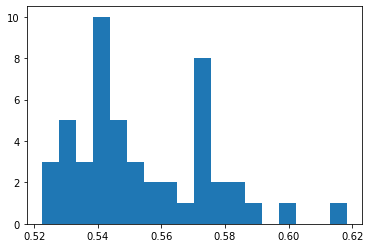

In [82]:
plt.hist(weighted_averages, bins = 18)

In [83]:
np.median(weighted_averages)

0.5471

In [84]:
sorted(weighted_averages)

[0.5225,
 0.5252,
 0.5268,
 0.5302,
 0.5307,
 0.5314,
 0.5319,
 0.5319,
 0.5341,
 0.5341,
 0.5357,
 0.5385,
 0.5387,
 0.5395,
 0.5396,
 0.5397,
 0.5399,
 0.5404,
 0.5407,
 0.5409,
 0.5437,
 0.5442,
 0.5443,
 0.5451,
 0.5471,
 0.5473,
 0.5494,
 0.5504,
 0.5509,
 0.5559,
 0.5559,
 0.5602,
 0.5625,
 0.5681,
 0.5719,
 0.5719,
 0.5721,
 0.5734,
 0.5736,
 0.5736,
 0.5737,
 0.5747,
 0.5786,
 0.5803,
 0.5847,
 0.586,
 0.5863,
 0.6,
 0.6182]

In [85]:
np.median(weighted_averages)

0.5471